In [1]:
import os
import sys
sys.path.insert(0, os.path.dirname(os.path.abspath("")))

In [2]:
import random
from src.mel import Mel
from PIL import ImageOps, Image
from IPython.display import Audio
from diffusers import DDPMPipeline
from datasets import load_from_disk

In [3]:
mel = Mel(x_res=64, y_res=64, hop_length=1024)

### Run model inference to generate mel spectrogram

In [4]:
model_id = "../ddpm-ema-audio-64"
ddpm = DDPMPipeline.from_pretrained(model_id)  # you can replace DDPMPipeline with DDIMPipeline or PNDMPipeline for faster inference
images = ddpm(output_type="numpy")["sample"]
images = (images * 255).round().astype("uint8").transpose(0, 3, 1, 2)

  0%|          | 0/1000 [00:00<?, ?it/s]

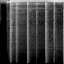

In [6]:
image = Image.fromarray(images[0][0])
image

### Transform mel spectrogram to audio

In [5]:
audio = mel.image_to_audio(image)
Audio(data=audio, rate=mel.get_sample_rate())

### Compare results with random sample from training set

In [7]:
ds = load_from_disk('../data-64')

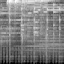

In [8]:
image = random.choice(ds['train'])['image']
image

In [9]:
audio = mel.image_to_audio(image)
Audio(data=audio, rate=mel.get_sample_rate())